# 📺 Netflix Movies and TV Shows – Exploratory Data Analysis

This project explores the Netflix dataset to uncover trends, distributions, and insights about content available on the platform.

**Dataset Source**: [Netflix Kaggle Dataset](https://www.kaggle.com/shivamb/netflix-shows)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Plotting style
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
 #Load Dataset
df = pd.read_csv('netflix_titles.csv')
df.shape


(8807, 12)

In [3]:
#Basic Info
df.head()

df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
#Missing Values
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

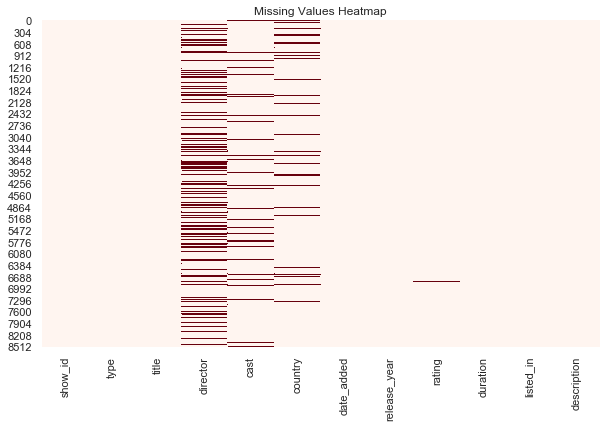

In [6]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
#Data Cleaning
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Fill missing values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing 'rating'
df.dropna(subset=['rating'], inplace=True)


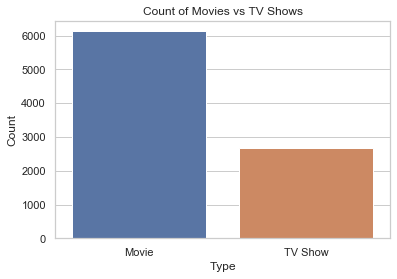

In [8]:
#Univariate Analysis
# Distribution of content type
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


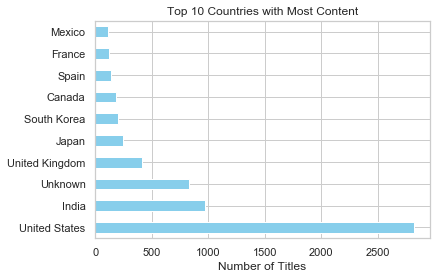

In [9]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Most Content', color='skyblue')
plt.xlabel('Number of Titles')
plt.show()


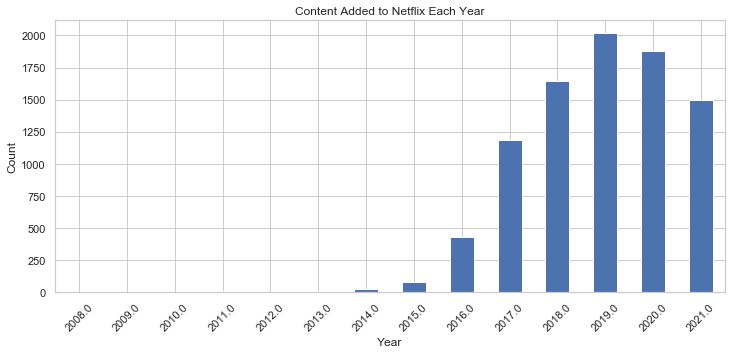

In [10]:
#Content by Year
# Content added per year
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title('Content Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


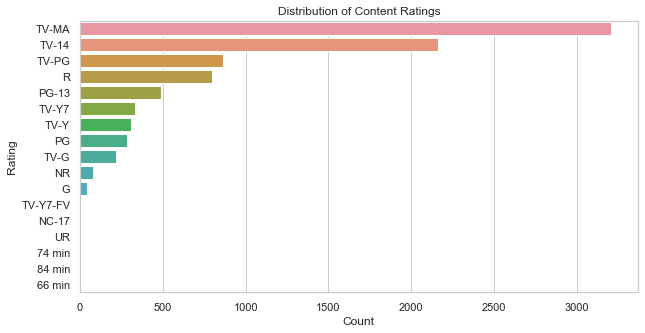

In [11]:
#Ratings Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


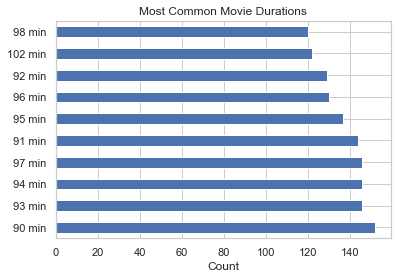

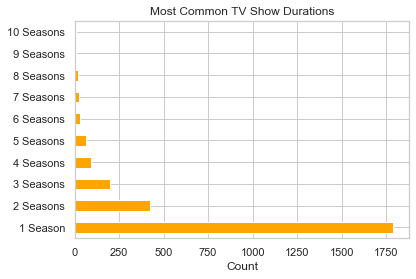

In [12]:
#Duration Analysis
# Separate out Movies and TV Shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Most common movie durations
movies['duration'].value_counts().head(10).plot(kind='barh', title='Most Common Movie Durations')
plt.xlabel('Count')
plt.show()

# Most common number of seasons
tv_shows['duration'].value_counts().head(10).plot(kind='barh', title='Most Common TV Show Durations', color='orange')
plt.xlabel('Count')
plt.show()


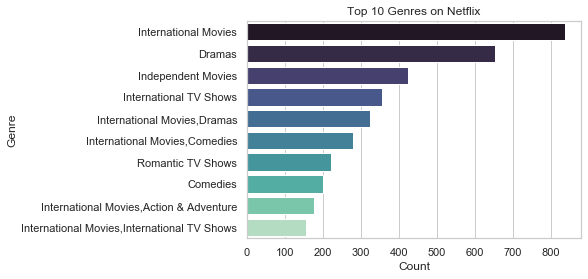

In [13]:
#Genre Analysis
# Top genres (listed_in)
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(', ')
top_genres = Counter(all_genres).most_common(10)

genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(data=genre_df, y='Genre', x='Count', palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.show()


## 🔍 Key Insights

- Netflix has more **Movies** than **TV Shows**.
- Most content is produced in the **United States**, followed by India and the UK.
- A significant number of titles were added between **2018 and 2020**.
- Common ratings are **TV-MA**, **TV-14**, and **PG**.
- Popular genres include **Dramas**, **International Movies**, and **Comedies**.


## ✅ Conclusion

This EDA revealed trends in Netflix's content library. These insights can help recommend content, plan regional strategies, or predict future trends in content acquisition.
